# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [ ]:
# Explore the number of children people reported in all years and in 2000.
childs = gss['childs']
year_2000 = gss[gss['year']==2000] 
childs_2000 = year_2000['childs']
print('The number of children reported in all years')
print(childs.value_counts())

print('\nThe number of children reported in 2000')
print(childs_2000.value_counts())  # This is consistent with the codebook.

childs.replace([9], np.nan, inplace=True)

print('\nSummary statistics for all years')
print(childs.describe())

In [67]:
# Explore the number of divorces overall and in several different years.
divorce = gss['divorce']
print('Divorces for all years')
print(hours.value_counts())

# Clean the data.
divorce.replace([0, 8, 9], np.nan, inplace=True)

# Decribe all years.
print('\nSummary statistics for all years.')
print(divorce.describe())

# Describe 1980.
year_1980 = gss[gss['year']==1980]
divorce_1980 = year_1980['divorce']

print('\nSummary statistics for 1980')
print(divorce_1980.describe())

# Describe 2010.
year_2010 = gss[gss['year']==2010]
divorce_2010 = year_2010['divorce']

print('\nSummary statistics for 2010')
print(divorce_2010.describe())

Divorces for all years
2.0    30910
1.0     7988
Name: divorce, dtype: int64

Summary statistics for all years.
count    38898.000000
mean         1.794642
std          0.403968
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: divorce, dtype: float64

Summary statistics for 1980
count    1041.000000
mean        1.837656
std         0.368943
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: divorce, dtype: float64

Summary statistics for 2010
count    1071.000000
mean        1.759104
std         0.427827
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: divorce, dtype: float64


## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

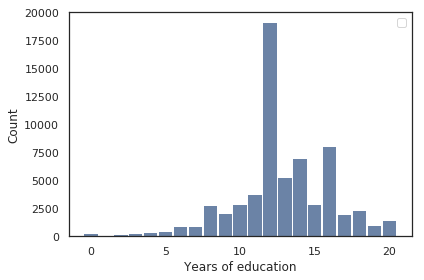

In [13]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

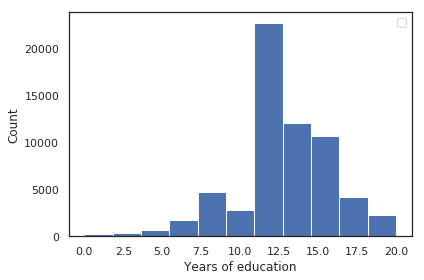

In [74]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna(), bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

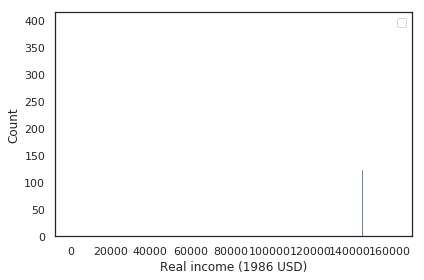

In [15]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

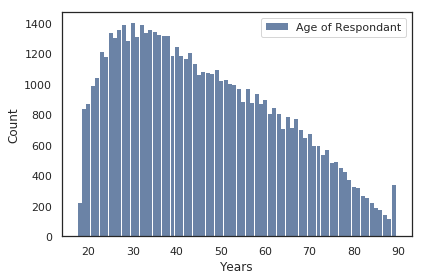

In [75]:
# Plot a histogram of age.
age = gss['age']
age_hist = Hist(age)
thinkplot.hist(age_hist, label='Age of Respondant')
decorate(xlabel='Years', ylabel='Count')

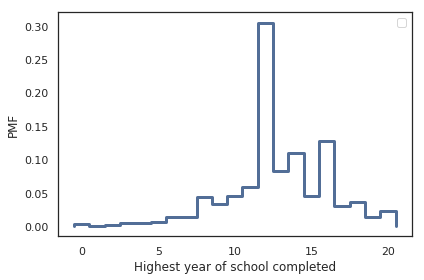

In [142]:
# Plot a probablility mass function of highest year of school completed.
educ = gss['educ']
educ_pmf = Pmf(educ)
thinkplot.Pmf(educ_pmf)
decorate(xlabel='Highest year of school completed', ylabel='PMF')


In [110]:
# Percentage of people with 12 years of education.
print('{:.2f}% of respondants have 12 years of education'.format(100 * educ_pmf[12]))


30.51% of respondants have 12 years of education


In [113]:
# Percentage of people with 14 years of education.
print('{:.2f}% of respondants have 14 years of education'.format(100 * educ_pmf[14]))

10.99% of respondants have 14 years of education


In [114]:
# Percentage of people with 16 years of education.
print('{:.2f}% of respondants have 16 years of education'.format(100 * educ_pmf[16]))

12.72% of respondants have 16 years of education


**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

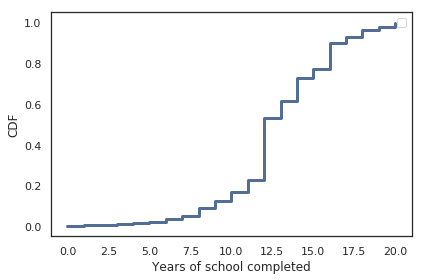

In [137]:
# Plot a cumulative distribution function of the number of years of school completed.
educ_cdf = Cdf(educ)
thinkplot.Cdf(educ_cdf)
decorate(xlabel='Years of school completed', ylabel='CDF')

In [118]:
# Fraction of people with more than 12 years of education.
print('{:.2f} respondants have more than 12 years of education.'.format(1 - educ_cdf[12]))

0.47 respondants have more than 12 years of education.


**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

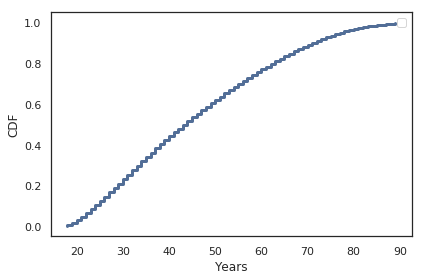

In [138]:
# Cdf of age
age_cdf = Cdf(age)
thinkplot.Cdf(age_cdf)
decorate(xlabel='Years', ylabel='CDF')

In [131]:
# Median age.
print('The median age is {:.0f} years.'.format(age_cdf.Value(0.5)))

The median age is 44 years.


In [135]:
# Interquartile range of ages.
age_cdf.Value(0.25), age_cdf.Value(0.75)
print('The IQR of ages is {:.0f} years.'.format(age_cdf.Value(0.75) - age_cdf.Value(0.25)))

The IQR of ages is 28 years.


**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

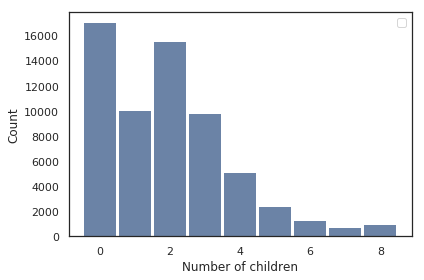

In [140]:
# Histogram of number of children.
childs_hist = Hist(childs)
thinkplot.Hist(childs_hist)
decorate(xlabel='Number of children', ylabel='Count')

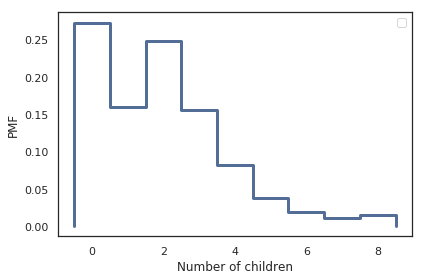

In [144]:
# PMF of number of children.
childs_pmf = Pmf(childs)
thinkplot.Pmf(childs_pmf)
decorate(xlabel='Number of children', ylabel='PMF')

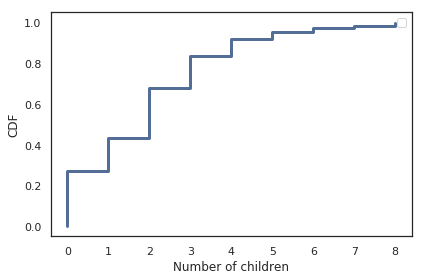

In [145]:
# CDF of number of children
childs_cdf = Cdf(childs)
thinkplot.Cdf(childs_cdf)
decorate(xlabel='Number of children', ylabel='CDF')

In [149]:
# Some statistics

print('The probability that a respondant has 0 children is {:.2f}%'.format(childs_pmf[0]))
print('The probability that a respondant has 8 or more children is {:.2f}%'.format(childs_pmf[8]))

print('The median number of children is {:.0f}.'.format(childs_cdf.Value(0.5)))
print('The IQR of number of children is {:.0f}'.format(childs_cdf.Value(0.75) - childs_cdf.Value(0.25)))

The probability that a respondant has 0 children is 0.27%
The probability that a respondant has 8 or more children is 0.01%
The median number of children is 2.
The IQR of number of children is 3


**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [159]:
# CDF of realinc for males.
gcc_male = gss[gss['sex']==1]
male_realinc = gcc_male['realinc']
male_realinc_cdf = Cdf(male_realinc, label='Male realinc')

In [160]:
# CDF of realinc for females.
gcc_female = gss[gss['sex']==2]
female_realinc = gcc_female['realinc']
female_realinc_cdf = Cdf(female_realinc, label='Female realinc')

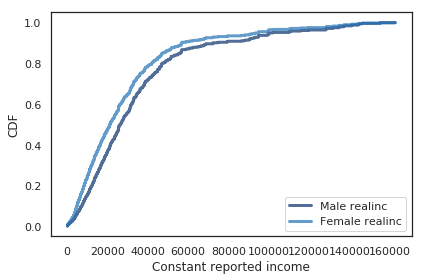

In [163]:
# Plot both CDFs on the same axes
thinkplot.Cdfs([male_realinc_cdf, female_realinc_cdf])
decorate(xlabel='Constant reported income', ylabel='CDF')

In [164]:
# Difference in median income between groups.
male_median = male_realinc_cdf.Value(0.5)
female_median = female_realinc_cdf.Value(0.5)
print('Male median: {}\nFemale median: {}\nDifference: {}'.format(male_median, female_median, male_median - female_median))

Male median: 26484.0
Female median: 21299.0
Difference: 5185.0


**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [168]:
# Plot multiple CDFs of number of children for a select number of years.

# I chose 15 year increments, except for 2016 which is the most recent data available.
year_1972 = gss[gss['year']==1972]
year_1987 = gss[gss['year']==1987]
year_2002 = gss[gss['year']==2002]
year_2016 = gss[gss['year']==2016]

childs_1972 = year_1972['childs']
childs_1987 = year_1987['childs']
childs_2002 = year_2002['childs']
childs_2016 = year_2016['childs']

In [169]:
# Calculate CDFs for each year.
cdf_1972 = Cdf(childs_1972, label='children in 1972')
cdf_1987 = Cdf(childs_1987, label='children in 1987')
cdf_2002 = Cdf(childs_2002, label='children in 2002')
cdf_2016 = Cdf(childs_2016, label='children in 2016')

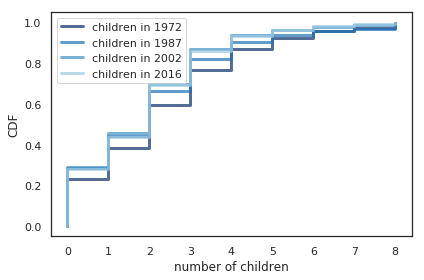

In [170]:
# Plot all CDF on same axes.
thinkplot.Cdfs([cdf_1972, cdf_1987, cdf_2002, cdf_2016])
decorate(xlabel='number of children', ylabel='CDF')

In [175]:
# Describe each year.
print('1972:\n', childs_1972.describe())
print('IQR\t', cdf_1972.Value(0.75) - cdf_1972.Value(0.25))

print('\n1987:\n', childs_1987.describe())
print('IQR\t', cdf_1987.Value(0.75) - cdf_1987.Value(0.25))

print('\n2002:\n', childs_2002.describe())
print('IQR\t', cdf_2002.Value(0.75) - cdf_2002.Value(0.25))

print('\n2016:\n', childs_2016.describe())
print('IQR\t', cdf_2016.Value(0.75) - cdf_2016.Value(0.25))

1972:
 count    1605.000000
mean        2.297196
std         1.981403
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: childs, dtype: float64
IQR	 2.0

1987:
 count    1812.000000
mean        2.011589
std         1.942969
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: childs, dtype: float64
IQR	 3.0

2002:
 count    2760.000000
mean        1.810507
std         1.687630
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: childs, dtype: float64
IQR	 3.0

2016:
 count    2859.000000
mean        1.852046
std         1.669344
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: childs, dtype: float64
IQR	 3.0


It looks like the average number of children has decreased over the period of time that the survey has supplied data. The median number of children has stayed the same, but there is a greater difference in the IQR of the number of children. This suggests that more people are having a smaller number of children in more recent times, but there is not a large difference over the time period.

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [39]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [184]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [185]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 13.2 ms, sys: 28.7 ms, total: 41.8 ms
Wall time: 41 ms


(62466, 101)